# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import json #used for some testing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
cities = cities[:-590]
len(cities)

27

In [3]:
#testing

# queryURL = f"{url}appid={weather_api_key}&q={city}"

# citiesResponse = requests.get(queryURL)
# citiesJson = citiesResponse.json()



#create dataframe for city info
cityDF = pd.DataFrame(columns = ["Name", "ID", "Lat", "Lng"])
cityDF["Name"] = cities
cityDF["ID"] = ""
cityDF["Lat"] = ""
cityDF["Lng"] = ""
cityDF["Max Temp"] =""
cityDF["Humidity"]=""
cityDF["Cloudiness"]=""
cityDF["Wind Speed"]=""
cityDF.head()

,Name,ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,mataura,,,,,,,
1,karratha,,,,,,,
2,pangkalanbuun,,,,,,,
3,hermanus,,,,,,,
4,jatai,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
i = 0
for city in cities:
    queryURL = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    citiesResponse = requests.get(queryURL)
    citiesJson = citiesResponse.json()
    
    
    try:
        cityName = citiesJson["name"]
        cityID = citiesJson["id"]
        print(f"City Name: {cityName}. City ID: {cityID}.")
        cityDF.iloc[i,1] = cityID
        cityDF.iloc[i,2] = citiesJson["coord"]["lat"]
        cityDF.iloc[i,3] = citiesJson["coord"]["lon"]
        cityDF.iloc[i,4] = citiesJson["main"]["temp_max"]
        cityDF.iloc[i,5] = citiesJson["main"]["humidity"]
        cityDF.iloc[i,6] = citiesJson["clouds"]["all"]
        cityDF.iloc[i,7] = citiesJson["wind"]["speed"]        

    except (KeyError):
        print("OH NO!!!!!!!!!!")
    
    i+=1

City Name: Mataura. City ID: 6201424.
City Name: Karratha. City ID: 6620339.
City Name: Pangkalanbuun. City ID: 1632694.
City Name: Hermanus. City ID: 3366880.
City Name: Jatai. City ID: 3460064.
City Name: Dikson. City ID: 1507390.
City Name: Ponta do Sol. City ID: 2264557.
City Name: Roald. City ID: 3141667.
City Name: Erenhot. City ID: 2037485.
OH NO!!!!!!!!!!
City Name: Arraial do Cabo. City ID: 3471451.
City Name: Hofn. City ID: 2630299.
City Name: Esim. City ID: 2303611.
City Name: Bethel. City ID: 5282297.
City Name: Xinqing. City ID: 2033667.
City Name: Vaini. City ID: 4032243.
City Name: Hilo. City ID: 5855927.
OH NO!!!!!!!!!!
City Name: Sechura. City ID: 3691954.
City Name: Todos Santos. City ID: 3981432.
City Name: Tuatapere. City ID: 2180815.
City Name: Zeya. City ID: 2012593.
City Name: Saint-Francois. City ID: 2980080.
City Name: Ostrovnoy. City ID: 556268.
City Name: Itarema. City ID: 3393692.
City Name: 'Ewa Beach. City ID: 5855051.
City Name: Tuktoyaktuk. City ID: 6170

In [5]:
#format to number formats and drop NAs

cityDF[["ID", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]] = \
    cityDF[["ID", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]].apply(pd.to_numeric)

cityDF = cityDF.dropna()


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cityDF.to_csv("CityData.csv")

In [7]:
cityDF

,Name,ID,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,mataura,6201424.0,-46.19,168.86,74.73,61.0,73.0,1.39
1,karratha,6620339.0,-20.74,116.85,85.59,74.0,0.0,2.82
2,pangkalanbuun,1632694.0,-2.68,111.62,75.20,96.0,96.0,0.87
3,hermanus,3366880.0,-34.42,19.23,62.01,88.0,46.0,8.01
4,jatai,3460064.0,-17.88,-51.71,70.83,91.0,100.0,5.08
5,dikson,1507390.0,73.51,80.55,-7.82,96.0,100.0,7.07
6,ponta do sol,2264557.0,32.67,-17.10,60.80,67.0,20.0,5.82
7,roald,3141667.0,62.58,6.13,46.99,93.0,100.0,24.16
8,erenhot,2037485.0,43.65,111.98,13.96,78.0,0.0,7.72
10,arraial do cabo,3471451.0,-22.97,-42.03,75.79,83.0,0.0,9.40


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

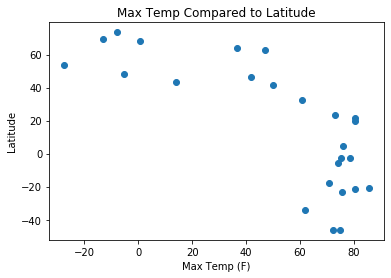

In [48]:
xTemp = cityDF["Max Temp"]
yLat = cityDF["Lat"]

plt.scatter(xTemp, yLat)
plt.title("Max Temp Compared to Latitude")
plt.xlabel("Max Temp (F)")
plt.ylabel("Latitude")
plt.show()

#### Latitude vs. Humidity Plot

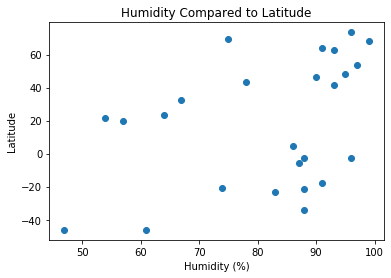

In [49]:
xHum = cityDF["Humidity"]
#using same yLat as above

plt.scatter(xHum, yLat)
plt.title("Humidity Compared to Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.show()

#### Latitude vs. Cloudiness Plot

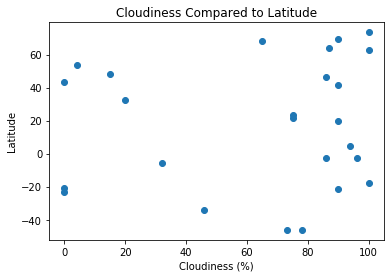

In [50]:
xCloud = cityDF["Cloudiness"]
#using same yLat as above

plt.scatter(xCloud, yLat)
plt.title("Cloudiness Compared to Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.show()

#### Latitude vs. Wind Speed Plot

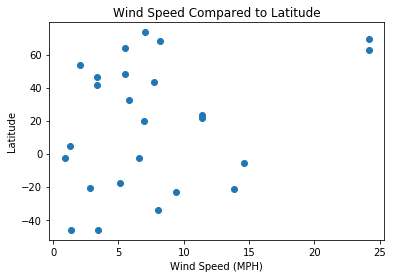

In [52]:
xWindSp = cityDF["Wind Speed"]
#using same yLat as above

plt.scatter(xWindSp, yLat)
plt.title("Wind Speed Compared to Latitude")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Latitude")
plt.show()

## Linear Regression

In [54]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    x=x_values.mean()-5 #just trying to come up with a good way to get x&y so the equation will show up nicely on the graph.
    y=y_values.mean()+5
    plt.annotate(line_eq, (x,y),fontsize=15,color="red")

In [55]:
# Create Northern and Southern Hemisphere DataFrames

northernCityDF = cityDF.loc[cityDF["Lat"]>0]
southernCityDF = cityDF.loc[cityDF["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

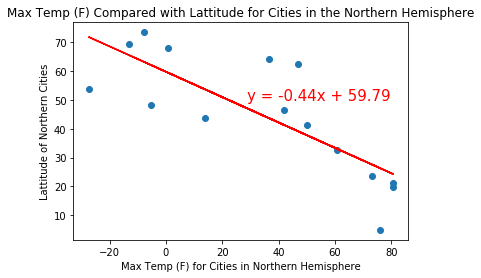

In [73]:
xNTemp = northernCityDF["Max Temp"]
yNLat = northernCityDF["Lat"]

linreg(xNTemp,yNLat)
plt.title("Max Temp (F) Compared with Lattitude for Cities in the Northern Hemisphere")
plt.xlabel("Max Temp (F) for Cities in Northern Hemisphere")
plt.ylabel("Lattitude of Northern Cities")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

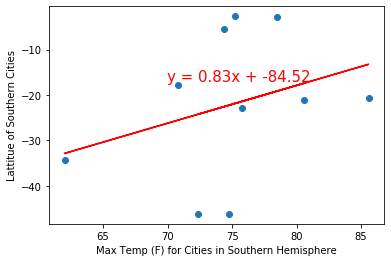

In [67]:
xSTemp = southernCityDF["Max Temp"]
ySLat = southernCityDF["Lat"]

linreg(xSTemp, ySLat)
plt.title("Max Temp (F) Compared with Lattitude for Cities in the Southern Hemisphere")
plt.xlabel("Max Temp (F) for Cities in Southern Hemisphere")
plt.ylabel("Lattitude of Southern Cities")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

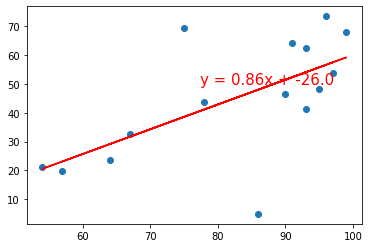

In [58]:
xNHum = northernCityDF["Humidity"]

linreg(xNHum, yNLat)
plt.title("Humidity (%) Compared with Lattitude for Cities in the Northern Hemisphere")
plt.xlabel("Humidity (%) for Cities in Northern Hemisphere")
plt.ylabel("Lattitude of Northern Cities")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

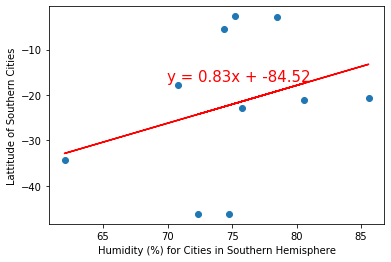

In [68]:
xSTemp = southernCityDF["Max Temp"]

linreg(xSTemp, ySLat)
plt.title("Humidity (%) Compared with Lattitude for Cities in the Southern Hemisphere")
plt.xlabel("Humidity (%) for Cities in Southern Hemisphere")
plt.ylabel("Lattitude of Southern Cities")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

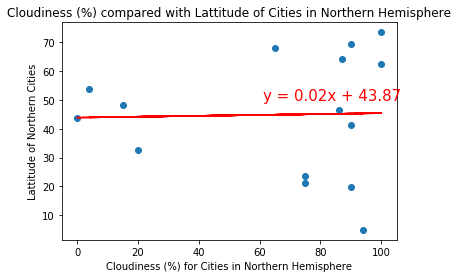

In [74]:
xNCloud = northernCityDF["Cloudiness"]

linreg(xNCloud, yNLat)
plt.title("Cloudiness (%) compared with Lattitude of Cities in Northern Hemisphere")
plt.xlabel("Cloudiness (%) for Cities in Northern Hemisphere")
plt.ylabel("Lattitude of Northern Cities")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

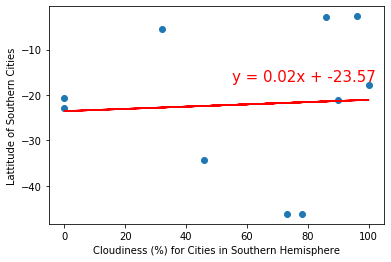

In [70]:
xSCloud = southernCityDF["Cloudiness"]

linreg(xSCloud, ySLat)
plt.title("Cloudiness (%) compared with Lattitude of Cities in Southern Hemisphere")
plt.xlabel("Cloudiness (%) for Cities in Southern Hemisphere")
plt.ylabel("Lattitude of Southern Cities")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

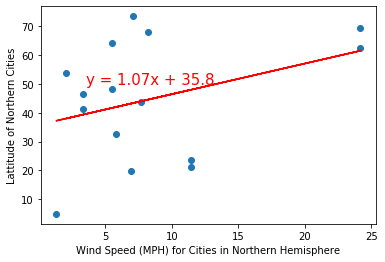

In [71]:
xNWindSp = northernCityDF["Wind Speed"]

linreg(xNWindSp, yNLat)
plt.title("Wind Speed (MPH) Compared with Lattitude for Cities in the Northern Hemisphere")
plt.xlabel("Wind Speed (MPH) for Cities in Northern Hemisphere")
plt.ylabel("Lattitude of Northern Cities")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

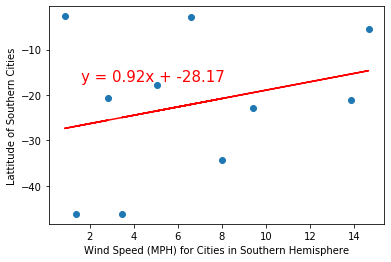

In [72]:
xSWindSp = southernCityDF["Wind Speed"]

linreg(xSWindSp, ySLat)
plt.title("Wind Speed (MPH) Compared with Lattitude for Cities in the Southern Hemisphere")
plt.xlabel("Wind Speed (MPH) for Cities in Southern Hemisphere")
plt.ylabel("Lattitude of Southern Cities")
plt.show()